# Transporte Público da Cidade do Natal

## Introdução

A questão do transporte público em Natal se destaca como uma questão de profunda importância e apreensão para os natalenses. O acesso ao serviço de transporte público de alta qualidade desempenha um papel fundamental na promoção da mobilidade urbana, viabilizando que os cidadãos se movam com facilidade e segurança por diversos pontos da cidade. A garantia da mobilidade urbana está intrinsecamente ligada ao conceito mais amplo de direito ao cidadão. 

No entanto, a atual situação na cidade de Natal é alarmante, caracterizada por vários desafios, que vão desde a degradação dos meios de transporte coletivo, a sobrecarga excessiva dos veículos até a carência de investimentos. Esses problemas dificultam consideravelmente o acesso ao serviço de tranporte público. Este notebook tem como objetivo realizar um estudo sobre o Transporte Público da Cidade do Natal, por meio da extração e análise de informações estatísticas relevantes acerca de mobilidade urbana da cidade do Sol.

![figures/vista-da-cidade-de-natal.jpg](figures/vista-da-cidade-de-natal.jpg)

## Obtenção dos Dados

Os dados foram obtidos diretamente do portal [Portal da Transparêcia da Mobilidade Urbana de Natal](http://dados.natal.br/group/mobilidade-urbana), página de dados da Prefeitura Municipal do Natal. No portal, é possível acessar as fontes de dados que contém registros da bilhetagem eletrônica a partir do ano de 2018 até 2022.

No portal, os dados sintéticos são apresentados por mês entre o período de 2018 até 2022, alguns relatórios sobre mudanças do transporte público ocasionado pela pandemia do COVID-19 e custos operacionais. Aqui focaremos na parte de bilhatem eletrônica.

## Análise Inicial e Limpeza dos Dados

Com o objetivo de entender o dataset em estudo, extraí algumas informações a respeito, como dimensões, colunas, tipos de variáveis, etc. Além disso, mostro o extenso dicionário de variáveis e verifico a qualidade dos dados.

In [1]:
# Carregando algumas bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

## Importando os dados

In [2]:
dados_2018 = pd.read_csv('../data/raw/01-dados-be-2018-analitico.csv', delimiter = ',', encoding='unicode_escape')
dados_2019 = pd.read_csv('../data/raw/01-dados-be-2019-analitico.csv', delimiter = ',')
dados_2020 = pd.read_csv('../data/raw/01-dados-be-2020-analitico.csv', delimiter = ',')
dados_2021 = pd.read_csv('../data/raw/01-dados-be-2021-analitico.csv', delimiter = ',')
dados_2022 = pd.read_csv('../data/raw/01-dados-be-2022-analitico.csv', delimiter = ',', encoding='unicode_escape')

#Verificando se os nomes das colunas são diferentes.
cols_set = set([tuple(dados_2018.columns), tuple(dados_2019.columns), tuple(dados_2020.columns), 
                        tuple(dados_2021.columns), tuple(dados_2022.columns)])

if len(cols_set) == 1:
    print("Todos os nomes das colunas são iguais em todos os DataFrames.")
    print("Nomes das colunas:", dados_2018.columns) 
else:
    print("Os nomes das colunas não são iguais em todos os DataFrames.")

Todos os nomes das colunas são iguais em todos os DataFrames.
Nomes das colunas: Index(['Mês', 'Empresa', 'Linha', 'Estudante_Cartao', 'Estudante_BT',
       'Vale_Transporte', 'Integracao_Plena', 'Integracao_Complementar',
       'Gratuito_Cartao', 'Gratuito_BT', 'Inteira_Cartao', 'Inteira_Especie',
       'Tarifa_Social', 'Qtd_Viagens'],
      dtype='object')


In [3]:
#Número total de dados

soma_linhas = sum([df.shape[0] for df in [dados_2018, dados_2019, dados_2020, dados_2021, dados_2022]])

data = {
    'Linhas': [dados_2018.shape[0], dados_2018.shape[0], dados_2020.shape[0], 
               dados_2021.shape[0], dados_2022.shape[0], soma_linhas],
    'Colunas': [dados_2018.shape[1], dados_2018.shape[1], dados_2020.shape[1], 
                dados_2021.shape[1], dados_2022.shape[1], '-']
}
info_df = pd.DataFrame(data, index=['Dados 2018', 'Dados 2019', 'Dados 2020', 'Dados 2021', 'Dados 2022', 'Total'])

info_df

,Linhas,Colunas
Dados 2018,1141,14
Dados 2019,1141,14
Dados 2020,940,14
Dados 2021,806,14
Dados 2022,697,14
Total,4734,-


## Análise Inicial dos Dados

Antes de iniciar a análise, vamos combinar todos os dados em uma única tabela já que todas tem os mesmos nomes de colunas. Após isso vou obter algumas informações a respeito, como dimensões, colunas, tipos de variáveis, etc.

In [4]:
#Unindo as tabelas
dados_2018['Ano'] = 2018
dados_2019['Ano'] = 2019
dados_2020['Ano'] = 2020
dados_2021['Ano'] = 2021
dados_2022['Ano'] = 2022

combined_df = pd.concat([dados_2018,dados_2019, dados_2020, dados_2021, dados_2022], ignore_index=True)

combined_df.head()

,Mês,Empresa,Linha,Estudante_Cartao,Estudante_BT,Vale_Transporte,Integracao_Plena,Integracao_Complementar,Gratuito_Cartao,Gratuito_BT,Inteira_Cartao,Inteira_Especie,Tarifa_Social,Qtd_Viagens,Ano
0,1,CONCEIÇÃO,21,13493,9506,35944,8671,0,17138,7397,6542,43727,3965,3684,2018
1,1,CONCEIÇÃO,22,4644,3371,13088,3230,0,8109,3157,2529,15363,0,1737,2018
2,1,CONCEIÇÃO,30,8519,5614,20580,5346,0,7265,3191,4415,21507,1537,2500,2018
3,1,CONCEIÇÃO,31,9631,6020,23460,7587,0,7065,2922,5491,22212,140,2478,2018
4,1,CONCEIÇÃO,41,6556,4038,20388,7924,0,5704,2791,3883,13870,0,2296,2018


In [5]:
# Verificação da dimensão do dataframe
print("Colunas: ", combined_df.shape[1])
print("Linhas: ", combined_df.shape[0])   

Colunas:  15
Linhas:  4734


Vamos mostrar as variáveis presentes no dataframe e o tipo delas. Para isso, imprimiremos o nome das colunas e a seguir os tipos.

In [6]:
combined_df.columns

Index(['Mês', 'Empresa', 'Linha', 'Estudante_Cartao', 'Estudante_BT',
       'Vale_Transporte', 'Integracao_Plena', 'Integracao_Complementar',
       'Gratuito_Cartao', 'Gratuito_BT', 'Inteira_Cartao', 'Inteira_Especie',
       'Tarifa_Social', 'Qtd_Viagens', 'Ano'],
      dtype='object')

Vamos juntar a coluna **Mês** e **Ano** em uma coluna **Data** e convertê-la para o tipo datetime.

In [7]:
# Criar uma nova coluna 'Data' juntando as colunas 'Mês' e 'Ano'
combined_df['Data'] = combined_df['Ano'].astype(str) + '-' + combined_df['Mês'].astype(str).str.zfill(2)

# Converter a coluna 'Data' para o tipo datetime
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%Y-%m')

#combined_df = combined_df.drop(['Mês', 'Ano'], axis=1)

combined_df['Ano'] = combined_df.Data.map(lambda x: datetime.strftime(x,"%Y"))
combined_df['Mês'] = combined_df.Data.map(lambda x: datetime.strftime(x,"%B"))

# Convertendo a coluna Linha para string
combined_df['Linha'] = combined_df['Linha'].astype('str')

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Mês                      4734 non-null   object        
 1   Empresa                  4734 non-null   object        
 2   Linha                    4734 non-null   object        
 3   Estudante_Cartao         4734 non-null   int64         
 4   Estudante_BT             4734 non-null   int64         
 5   Vale_Transporte          4734 non-null   int64         
 6   Integracao_Plena         4734 non-null   int64         
 7   Integracao_Complementar  4734 non-null   int64         
 8   Gratuito_Cartao          4734 non-null   int64         
 9   Gratuito_BT              4734 non-null   int64         
 10  Inteira_Cartao           4734 non-null   int64         
 11  Inteira_Especie          4734 non-null   int64         
 12  Tarifa_Social            4734 non-

O dataset é composto, majoritariamente, por variáveis do tipo inteiro, string e datetime. Segue o dicionário das variáveis.

**Dicionário de Variáveis**

- Empresa: Nome da empresa de ônibus
- Linha: Número do intinerário
- Estudante_Cartao: Bilhete pago com o cartão de estudante
- Estudante_BT: Bilhete pago com o bilhete de transporte
- Vale_Transporte: Bilhete pago com o cartão de vale transporte
- Integracao_Plena: Integração 
- Integracao_Complementar:
- Gratuito_Cartao: Bilhete gratuito a partir do cartão
- Gratuito_BT: Bilhete gratuito a partir do cartão
- Inteira_Cartao: Bilhete pago com o cartão de vale transporte
- Inteira_Especie: Bilhete pago em espécie
- Tarifa_Social: Bilhete pela metade do seu valor em feriados
- Qtd_Viagens : Quantidade de viagens
- Data: Mês e ano

A partir dessas variáveis podemos criar 5 novas que as generalizam da seguinte forma.

Inteira = Vale_Transporte + Inteira_Cartao + Inteira_Especie

Estudante = Estudante_Cartao + Estudante_BT

Gratuidade = Gratuito_Cartao + Gratuito_BT

Social = Tarifa_Social

Integração = Integracao_Plena + Integracao_Complementar


In [8]:
combined_df['Inteira'] = combined_df['Vale_Transporte'] + combined_df['Inteira_Cartao'] + combined_df['Inteira_Especie']

combined_df['Estudante'] = combined_df['Estudante_Cartao'] + combined_df['Estudante_BT']

combined_df['Gratuidade'] = combined_df['Gratuito_Cartao'] + combined_df['Gratuito_BT']

combined_df['Social'] = combined_df['Tarifa_Social'] + combined_df['Gratuito_BT']

combined_df['Integracao'] = combined_df['Integracao_Plena'] + combined_df['Integracao_Complementar']

combined_df['Qtd_Passageiros'] = combined_df['Inteira'] + combined_df['Estudante'] + combined_df['Gratuidade'] + \
                                    + combined_df['Social'] + combined_df['Integracao']  

combined_df['Eficiencia'] = combined_df['Qtd_Passageiros'] / combined_df['Qtd_Viagens']


combined_df = combined_df.drop(['Vale_Transporte', 'Inteira_Cartao', 'Inteira_Especie', 'Estudante_Cartao', 
                                'Estudante_BT', 'Gratuito_Cartao', 'Gratuito_BT', 'Tarifa_Social', 'Integracao_Plena', 
                                'Integracao_Complementar'], axis =1)


combined_df.to_csv('../data/processed/combined_df.csv', index=False)

Com as informações relacionadas a dimensão, colunas, tipos de variáveis e algumas alterações das colunas, irei imprimir as primeiras linhas do dataframe para ter uma visão inicial do conjunto após isso, vou verificar a quantidade de valores ausentes.

In [9]:
# Primeiras linhas do dataframe
combined_df.head()

,Mês,Empresa,Linha,Qtd_Viagens,Ano,Data,Inteira,Estudante,Gratuidade,Social,Integracao,Qtd_Passageiros,Eficiencia
0,January,CONCEIÇÃO,21,3684,2018,2018-01-01,86213,22999,24535,11362,8671,153780,41.742671
1,January,CONCEIÇÃO,22,1737,2018,2018-01-01,30980,8015,11266,3157,3230,56648,32.612550
2,January,CONCEIÇÃO,30,2500,2018,2018-01-01,46502,14133,10456,4728,5346,81165,32.466000
3,January,CONCEIÇÃO,31,2478,2018,2018-01-01,51163,15651,9987,3062,7587,87450,35.290557
4,January,CONCEIÇÃO,41,2296,2018,2018-01-01,38141,10594,8495,2791,7924,67945,29.592770


In [10]:
# Verificando se existe nulos
combined_df.isnull().sum()

Mês                0
Empresa            0
Linha              0
Qtd_Viagens        0
Ano                0
Data               0
Inteira            0
Estudante          0
Gratuidade         0
Social             0
Integracao         0
Qtd_Passageiros    0
Eficiencia         0
dtype: int64

In [11]:
# Este trecho de código detecta se há algum valor ausente que está sendo representado por '?', células em branco ou N/A.
for i in combined_df.columns.tolist():
    if ('?' in combined_df[i].tolist() or ' ' in combined_df[i].tolist() or 'N/A' in combined_df[i].tolist()):
        flag = True
    else:
        flag = False
print(flag)

False


Veja que o dataframe não possui valores NaN. Isso é algo positivo, pois valores NaN frequentemente indicam dados faltantes, incompletos ou corrompidos. Por outro lado, antes de criar o DataFrame, os dados podem ter sido pré-processados para tratar e preencher valores ausentes. E mais, os dados podem estar formatados de maneira que os valores ausentes não sejam representados como NaN, mas sim como outros valores específicos. 

### Resumo Estatístico da Bilhatem eletrônica

Com base na compreensão dos dados, é viável extrair as informações estatísticas pertinentes e analisar esses dados. Inicialmente, examinarei a distribuição dos dados, visando identificar possíveis valores discrepantes, desvios na distribuição e conjecturar premissas para efetuar a devida depuração.

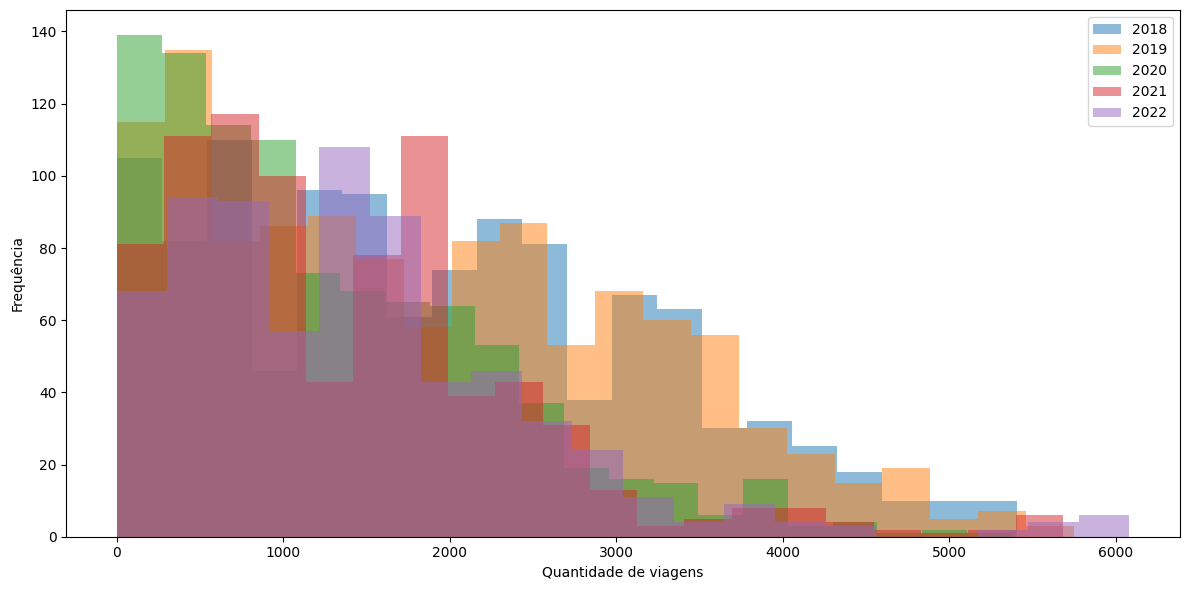

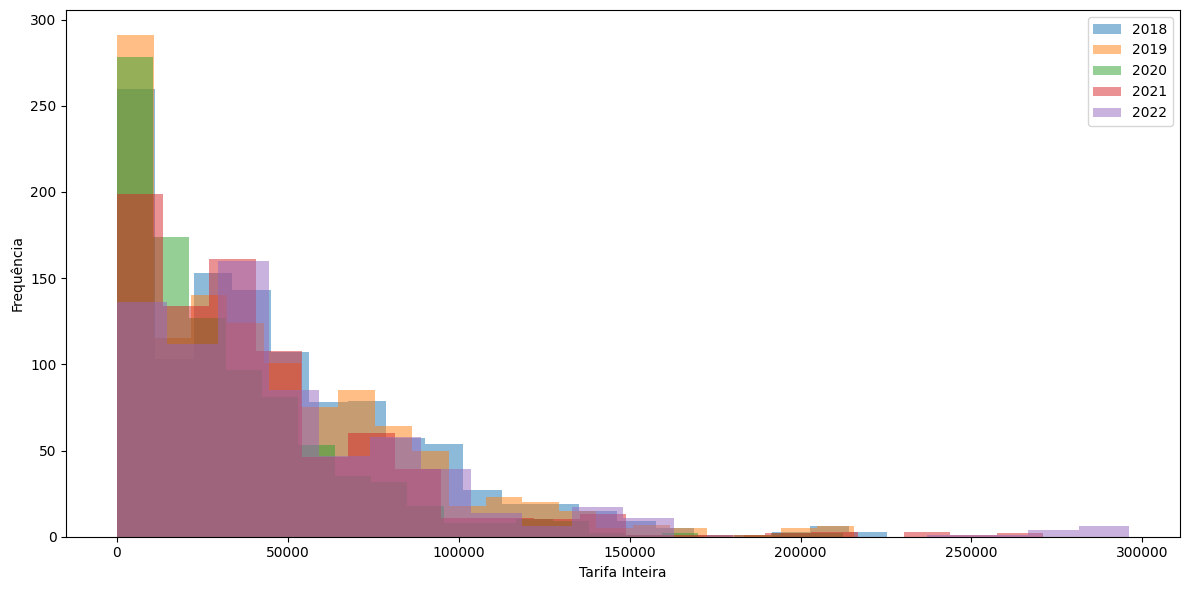

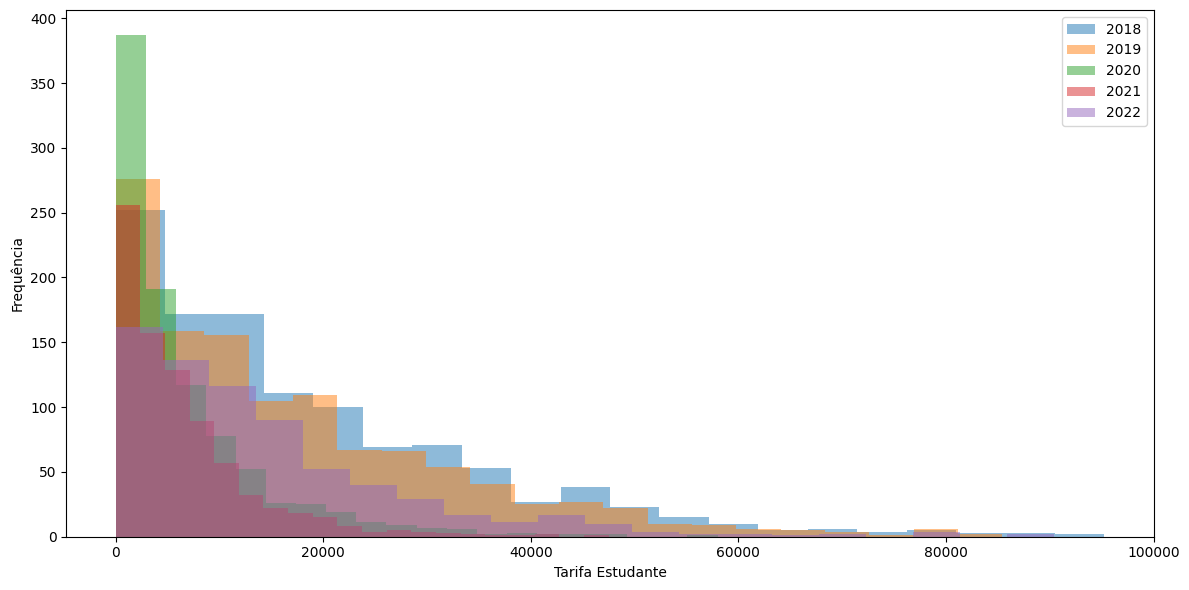

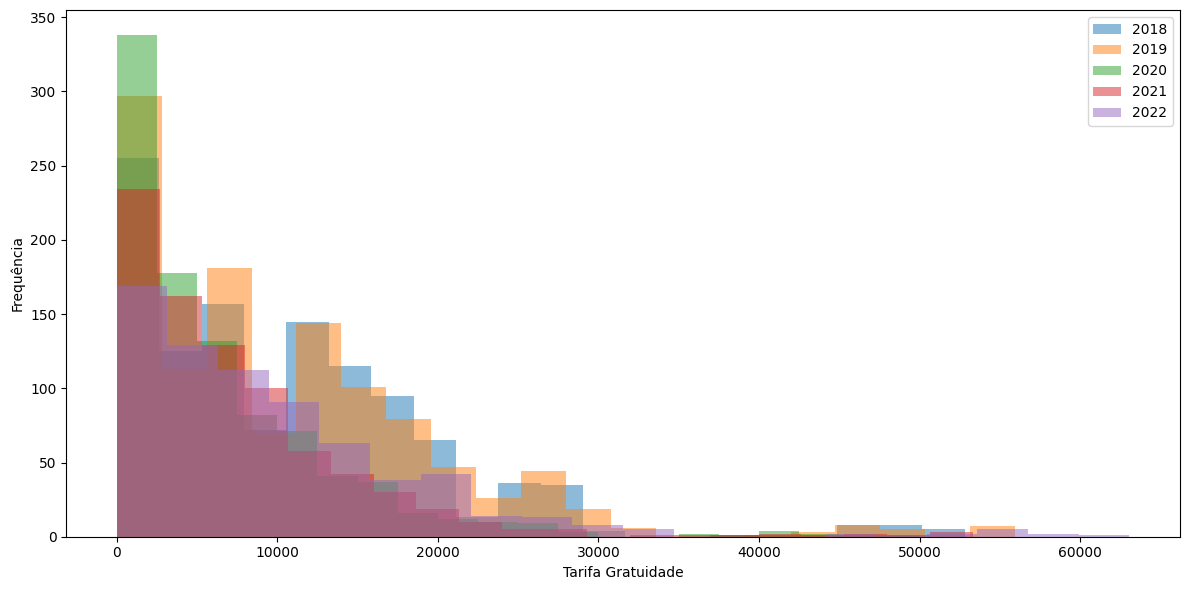

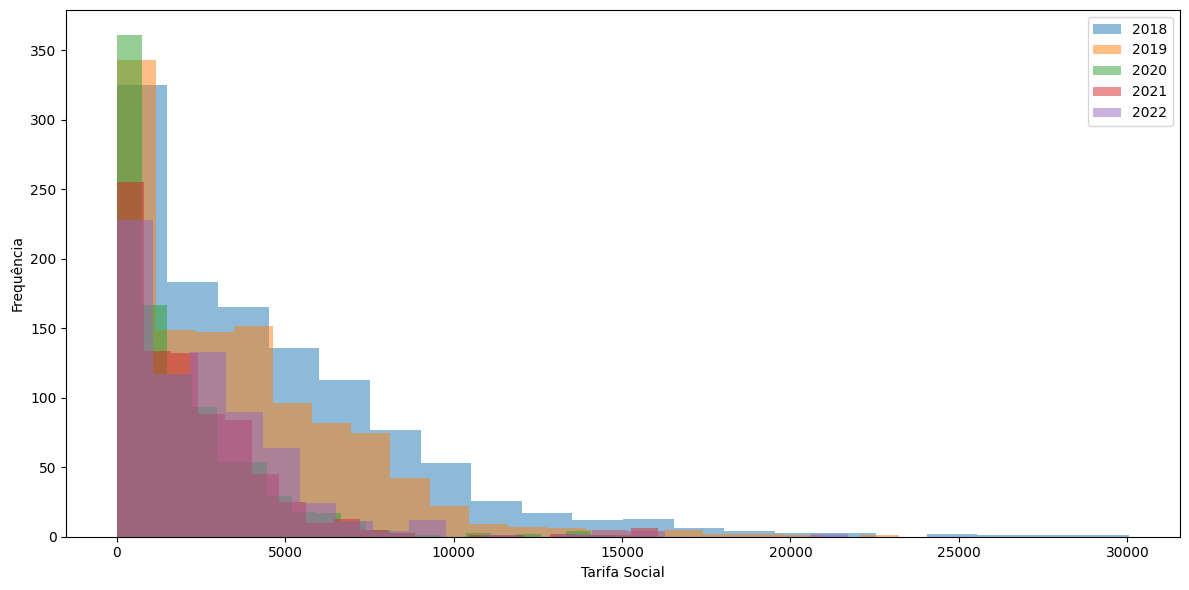

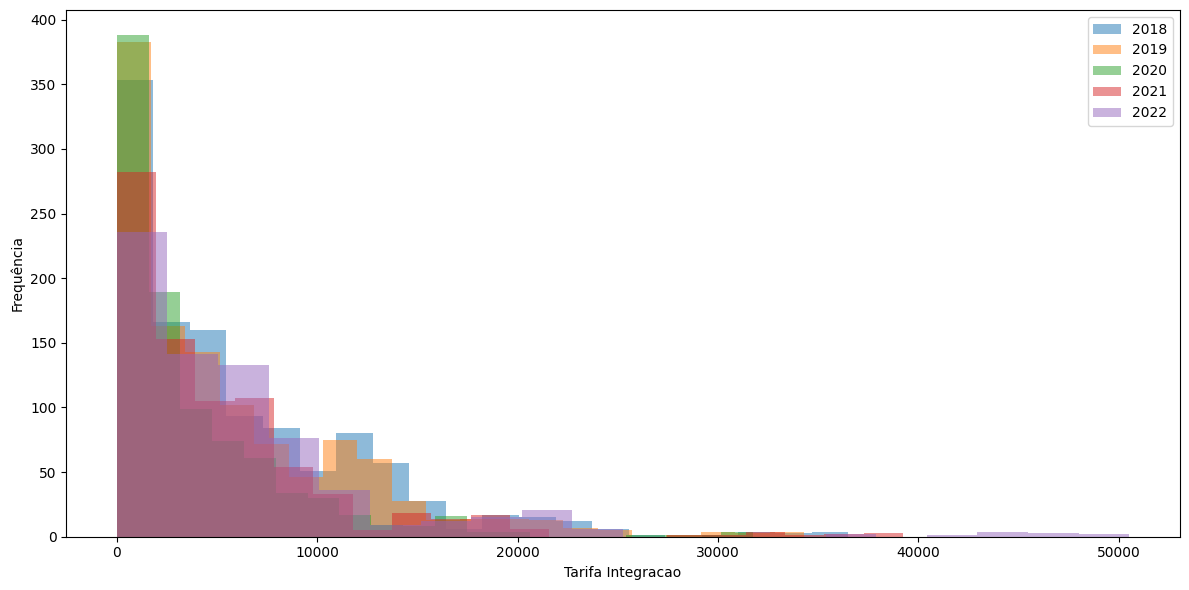

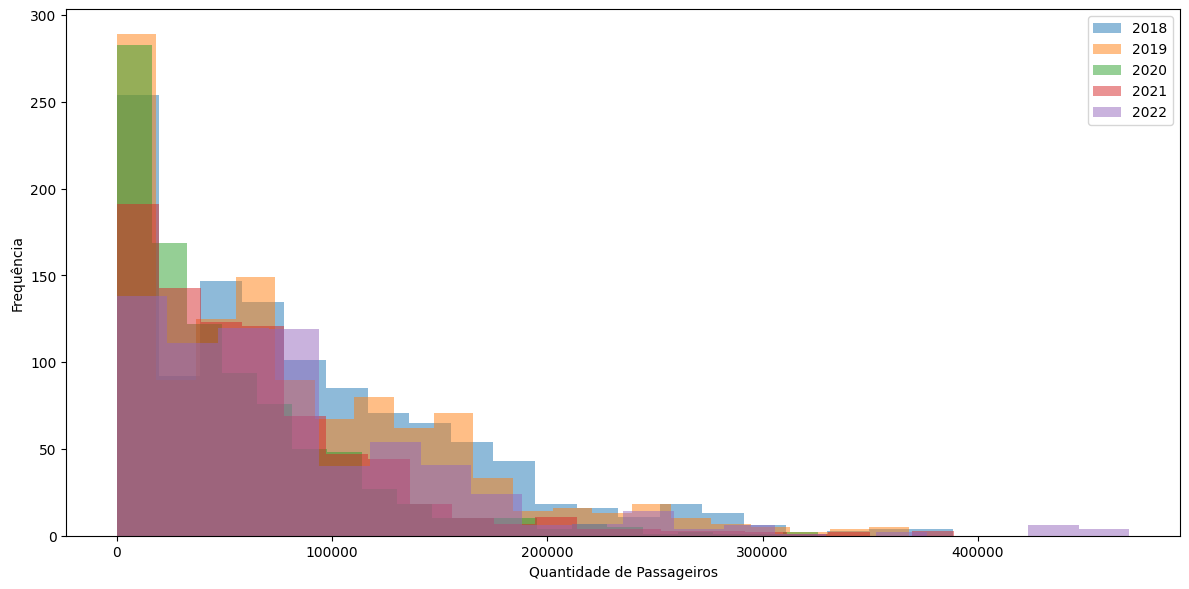

In [12]:
grouped_data = combined_df.groupby(combined_df['Data'].dt.to_period('Y'))

columns_to_plot = ['Qtd_Viagens', 'Inteira', 'Estudante', 
                   'Gratuidade', 'Social', 'Integracao', 'Qtd_Passageiros']

names = ['Quantidade de viagens', 'Tarifa Inteira', 'Tarifa Estudante', 
         'Tarifa Gratuidade', 'Tarifa Social', 'Tarifa Integracao', 'Quantidade de Passageiros']

for column, name in zip(columns_to_plot, names):
    plt.figure(figsize=(12, 6))
    #plt.title(f'{name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Frequência')

    for year, group in grouped_data:
        plt.hist(group[column], bins=20, alpha=0.5, label=str(year))

    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
grouped_data[columns_to_plot].describe().T

Data                            2018           2019           2020  \
Qtd_Viagens     count    1141.000000    1150.000000     940.000000   
                mean     1907.993865    1865.586087    1258.728723   
                std      1284.056937    1313.993825    1002.936250   
                min         1.000000       1.000000       1.000000   
                25%       760.000000     656.250000     478.000000   
                50%      1772.000000    1681.500000    1033.000000   
                75%      2817.000000    2865.250000    1888.250000   
                max      5407.000000    5747.000000    5373.000000   
Inteira         count    1141.000000    1150.000000     940.000000   
                mean    46746.138475   44007.996522   31767.590426   
                std     40461.153749   39819.279965   32634.089017   
                min         0.000000       0.000000       0.000000   
                25%     15808.000000    9757.250000    7468.750000   
                50%     36500.000000   34065.500000   22564.500000   
                75%     70211.000000   67297.250000   46076.000000   
                max    225315.000000  215724.000000  212572.000000   
Estudante       count    1141.000000    1150.000000     940.000000   
                mean    18500.142857   16835.258261    6665.341489   
                std     16941.659890   15815.671085    7937.997788   
                min         0.000000       0.000000       0.000000   
                25%      5623.000000    4539.750000    1322.250000   
                50%     13317.000000   12264.000000    3950.000000   
                75%     27382.000000   25020.750000    8920.000000   
                max     95265.000000   85412.000000   57991.000000   
Gratuidade      count    1141.000000    1150.000000     940.000000   
                mean    10699.585451   10618.326957    6425.541489   
                std      9215.870131    9599.426957    7044.281762   
                min         0.000000       0.000000       0.000000   
                25%      4041.000000    2534.500000    1549.500000   
                50%      8549.000000    8002.000000    4291.000000   
                75%     15617.000000   15626.500000    8965.250000   
                max     52802.000000   55948.000000   49979.000000   
Social          count    1141.000000    1150.000000     940.000000   
                mean     4506.679229    3647.780000    1861.158511   
                std      4216.357945    3400.449739    2086.986116   
                min         0.000000       0.000000       0.000000   
                25%      1238.000000     827.750000     398.000000   
                50%      3582.000000    2786.500000    1165.000000   
                75%      6600.000000    5564.500000    2614.500000   
                max     30060.000000   23216.000000   14821.000000   
Integracao      count    1141.000000    1150.000000     940.000000   
                mean     6118.658195    5721.530435    3799.927660   
                std      6175.743644    6016.970631    4541.876495   
                min         0.000000       0.000000       0.000000   
                25%      1475.000000    1213.000000     778.000000   
                50%      4132.000000    3683.000000    2280.000000   
                75%      9074.000000    8553.000000    5208.250000   
                max     36505.000000   34293.000000   31741.000000   
Qtd_Passageiros count    1141.000000    1150.000000     940.000000   
                mean    86571.204207   80830.892174   50519.559574   
                std     74273.879569   72051.758025   52234.362290   
                min         0.000000       0.000000       0.000000   
                25%     29153.000000   18245.250000   12190.500000   
                50%     68278.000000   63100.500000   34966.500000   
                75%    128060.000000  123214.000000   73053.750000   
                max    388362.000000  368026.000000  325610.000000   

Data     

É possível observar que maioria das variáveis possuem distribuiçãoes bem parecidas nos anos. 

Podemos obter o número de Empresas que operam e disponibilizam os dados da seguinte forma.

In [14]:
empresas = combined_df['Empresa'].unique()
numeros_empresa = len(empresas)
print("Em Natal temos {0} empresas, {1}.".format(numeros_empresa, empresas))

Em Natal temos 6 empresas, ['CONCEIÇÃO' 'DUNAS - URB' 'GUANABARA - URB' 'REUNIDAS'
 'SANTA MARIA - URB' 'VIA SUL - URB'].


## Total de Viagens por Ano e Empresa

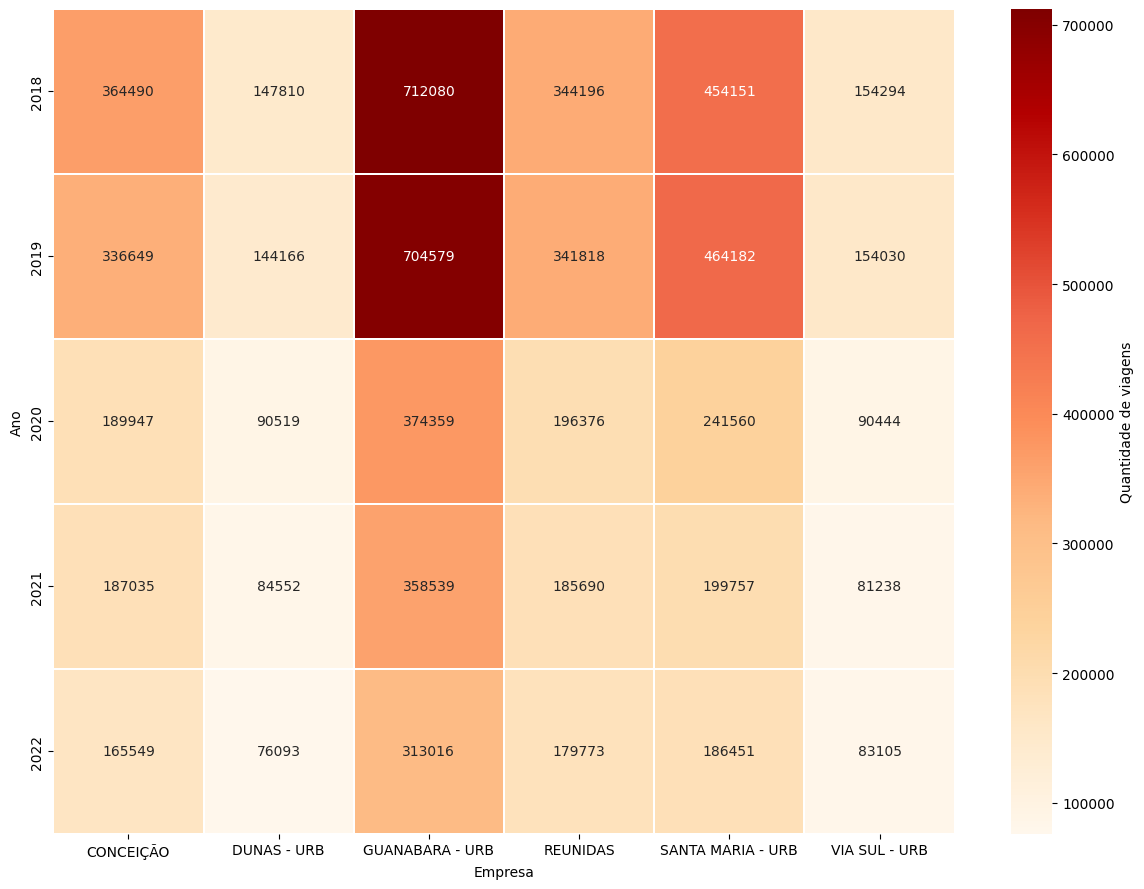

In [15]:
total_viagens_por_ano_empresa = combined_df.pivot_table(values='Qtd_Viagens', 
                                                        aggfunc='sum', columns='Empresa', index='Ano')

plt.figure(figsize=(12, 9))
sns.heatmap(total_viagens_por_ano_empresa, annot=True, 
            fmt='d', linewidths=1.4, cmap = 'OrRd', cbar_kws={'label': 'Quantidade de viagens'} )

plt.tight_layout()
plt.show()

In [56]:
def calcular_variacao_porcentagem(dataframe, ano1, ano2):
    
    ano1_valores = dataframe.loc[ano1]
    ano2_valores = dataframe.loc[ano2]

    
    variacao_porcentagem = ((ano2_valores - ano1_valores) / ano1_valores) * 100

    
    nome_coluna = f'Variação Porcentagem ({ano1}-{ano2})'
    resultado = pd.DataFrame({'Empresa': dataframe.columns,
        nome_coluna: variacao_porcentagem.values})

    return resultado

resultado_variacaoI = calcular_variacao_porcentagem(total_viagens_por_ano_empresa, '2020', '2022')
resultado_variacaoII = calcular_variacao_porcentagem(total_viagens_por_ano_empresa, '2018', '2022')

resultado_final = resultado_variacaoI.merge(resultado_variacaoII, on= 'Empresa')

print(resultado_final.to_markdown(index=False))

| Empresa           |   Variação Porcentagem (2020-2022) |   Variação Porcentagem (2018-2022) |
|:------------------|-----------------------------------:|-----------------------------------:|
| CONCEIÇÃO         |                          -12.8446  |                           -54.5806 |
| DUNAS - URB       |                          -15.937   |                           -48.5197 |
| GUANABARA - URB   |                          -16.3861  |                           -56.042  |
| REUNIDAS          |                           -8.4547  |                           -47.7702 |
| SANTA MARIA - URB |                          -22.8138  |                           -58.9452 |
| VIA SUL - URB     |                           -8.11441 |                           -46.1385 |


À partir do gráfico, podemos ver que entre os anos de 2018 e 2019 têm-se a maior quantidade de viagens feitas pelas empresas. Destaque para a empresa Guanabara que tem pelo menos 56% a mais de viagens que a Santa Maria nesse período. Note que entre no período de 2018 até 2022, a quantidade de viagens reduziu cerca de 56.04% no caso da Guanabara. E no período da pandemia (2020-2022) diminuiu 16.6%. De modo geral, na tabela abaixo mostro todas as variações de quantidade de viagens das empresas. 

| Empresa           |   Variação Porcentagem (2020-2022) |   Variação Porcentagem (2018-2022) |
|:------------------|-----------------------------------:|-----------------------------------:|
| CONCEIÇÃO         |                          -12.8446  |                           -54.5806 |
| DUNAS - URB       |                          -15.937   |                           -48.5197 |
| GUANABARA - URB   |                          -16.3861  |                           -56.042  |
| REUNIDAS          |                           -8.4547  |                           -47.7702 |
| SANTA MARIA - URB |                          -22.8138  |                           -58.9452 |
| VIA SUL - URB     |                           -8.11441 |                           -46.1385 |

In [104]:
soma_total_por_ano = total_viagens_por_ano_empresa.sum(axis=1)

soma_total_por_empresa = total_viagens_por_ano_empresa.sum()


df_ano = pd.DataFrame({'Ano': soma_total_por_ano.index,'Total de Viagens': soma_total_por_ano}).reset_index(drop=True)
df_empresa = pd.DataFrame({'Empresa': soma_total_por_empresa.index,'Total de Viagens': soma_total_por_empresa}).reset_index(drop=True)

# Juntar os DataFrames em um único DataFrame
resultado = pd.concat([df_empresa, df_ano], axis=1).fillna('-')

print(resultado.to_markdown(index=False))

| Empresa           |   Total de Viagens | Ano   | Total de Viagens   |
|:------------------|-------------------:|:------|:-------------------|
| CONCEIÇÃO         |            1243670 | 2018  | 2177021.0          |
| DUNAS - URB       |             543140 | 2019  | 2145424.0          |
| GUANABARA - URB   |            2462573 | 2020  | 1183205.0          |
| REUNIDAS          |            1247853 | 2021  | 1096811.0          |
| SANTA MARIA - URB |            1546101 | 2022  | 1003987.0          |
| VIA SUL - URB     |             563111 | -     | -                  |


Na tabela abaixo temos o total de viagens por ano. De acordo com os dados disponibilizados, o número de viagens diminuiu cerca de 1.45%, entre 2018 e 2019. Enquanto isso de 2019 à 2020, houve uma queda de 44.84% devido a pandemia do COVID-19. 
Nesse mesmo período de 5 anos, temos também o número de viagens por cada empresas que operam em Natal e estão na base de dados. Esses número estão na tabela a seguir.

| Empresa           |   Total de Viagens | Ano   | Total de Viagens   |
|:------------------|-------------------:|:------|:-------------------|
| CONCEIÇÃO         |            1.243.670 | 2018  | 2.177.021          |
| DUNAS - URB       |             543.140 | 2019  | 2.145.424          |
| GUANABARA - URB   |            2.462.573 | 2020  | 1.183.205          |
| REUNIDAS          |            1.247.853 | 2021  | 1.096.811          |
| SANTA MARIA - URB |            1.546.101 | 2022  | 1.003.987          |
| VIA SUL - URB     |             563.111 | -     | -                  |



## Como a média de viagens varia ao longo dos meses e anos?

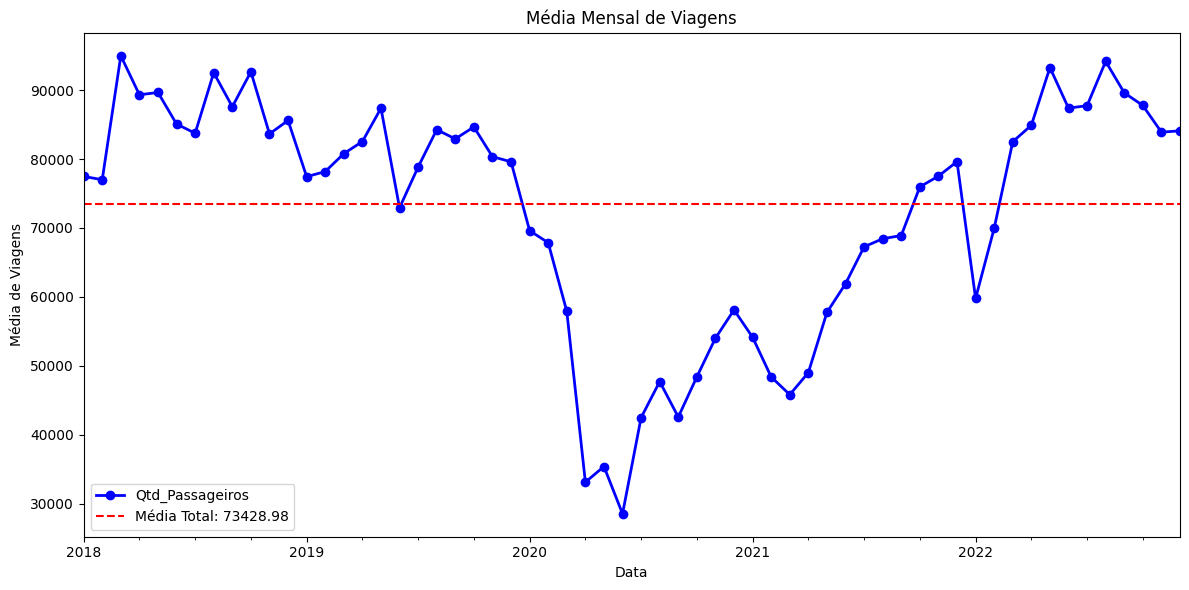

In [106]:
combined_df['Data'] = pd.to_datetime(combined_df['Data'])

media_mensal_viagens = combined_df.groupby(combined_df['Data'].dt.to_period('M'))['Qtd_Passageiros'].mean()

plt.figure(figsize=(12, 6))
media_mensal_viagens.plot(marker='o', linestyle='-', color='b', markersize=6, linewidth=2)
plt.title('Média Mensal de Viagens')

media_total = combined_df['Qtd_Passageiros'].mean()
plt.axhline(y=media_total, color='r', linestyle='--', label=f'Média Total: {media_total:.2f}')

plt.legend()

plt.ylabel('Média de Viagens')
plt.tight_layout()
plt.show()


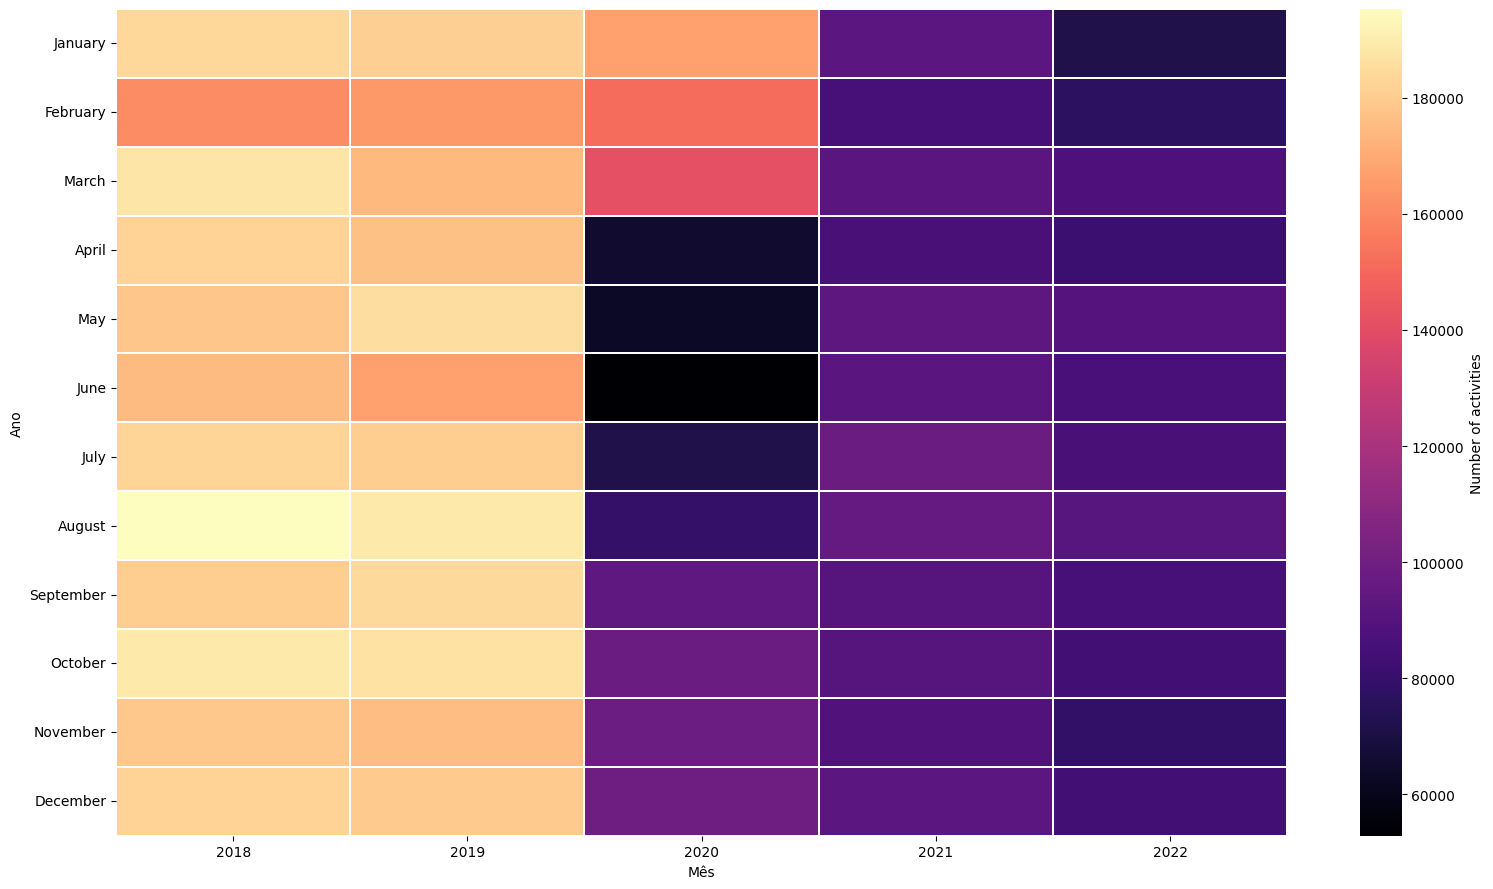

In [19]:
tableII = combined_df.pivot_table(values='Qtd_Viagens', aggfunc='sum', columns='Ano', index='Mês')

column_orderI = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 
          'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

tableII = tableII.reindex(column_orderI, axis=0)

plt.figure(figsize=(16,9))
sns.heatmap(tableII, linewidths=1.4, cmap='magma', cbar_kws={'label': 'Number of activities'})

plt.xlabel('Mês')
#plt.yticks(labels, fontsize=14)
plt.ylabel('Ano')
plt.tight_layout()
#plt.show()

In [20]:
range(len(tableII.index))

range(0, 12)

## Média de Viagens por Empresa

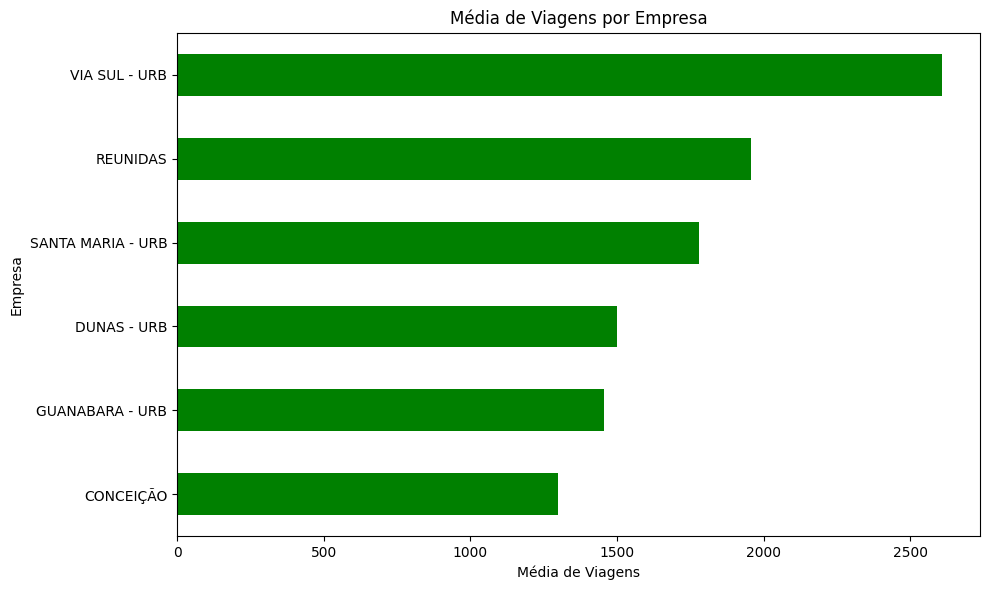

In [21]:
media_viagens_por_empresa = combined_df.groupby('Empresa')['Qtd_Viagens'].mean()

# Plotar a média de viagens por empresa
plt.figure(figsize=(10, 6))
media_viagens_por_empresa.sort_values().plot(kind='barh', color='green')
plt.title('Média de Viagens por Empresa')
plt.xlabel('Média de Viagens')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

## Distribuição de Tipos de Tarifa por Empresa

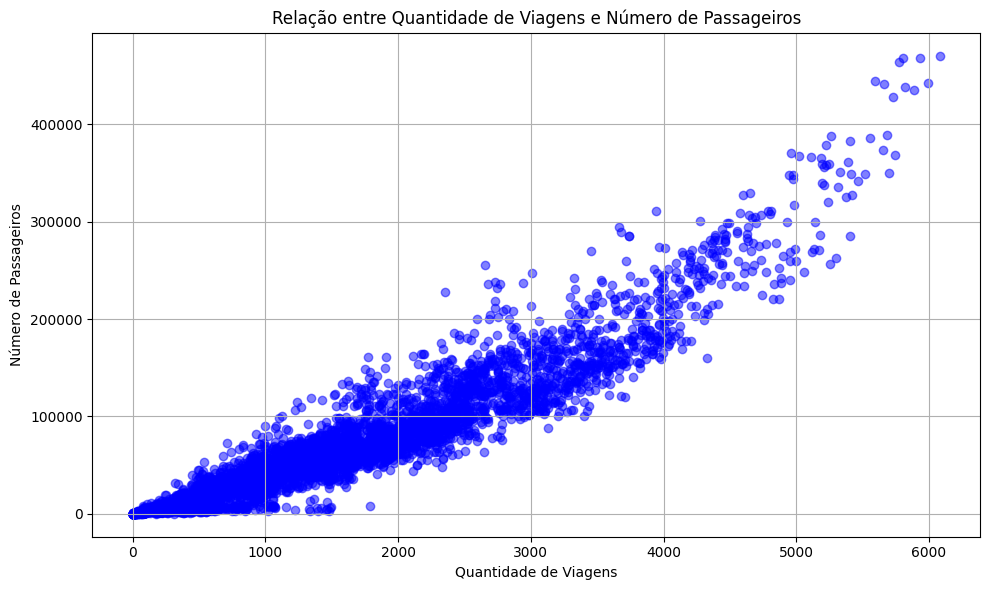

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Qtd_Viagens'], combined_df['Qtd_Passageiros'], alpha=0.5, color='blue')
plt.title('Relação entre Quantidade de Viagens e Número de Passageiros')
plt.xlabel('Quantidade de Viagens')
plt.ylabel('Número de Passageiros')
plt.grid()
plt.tight_layout()
plt.show()

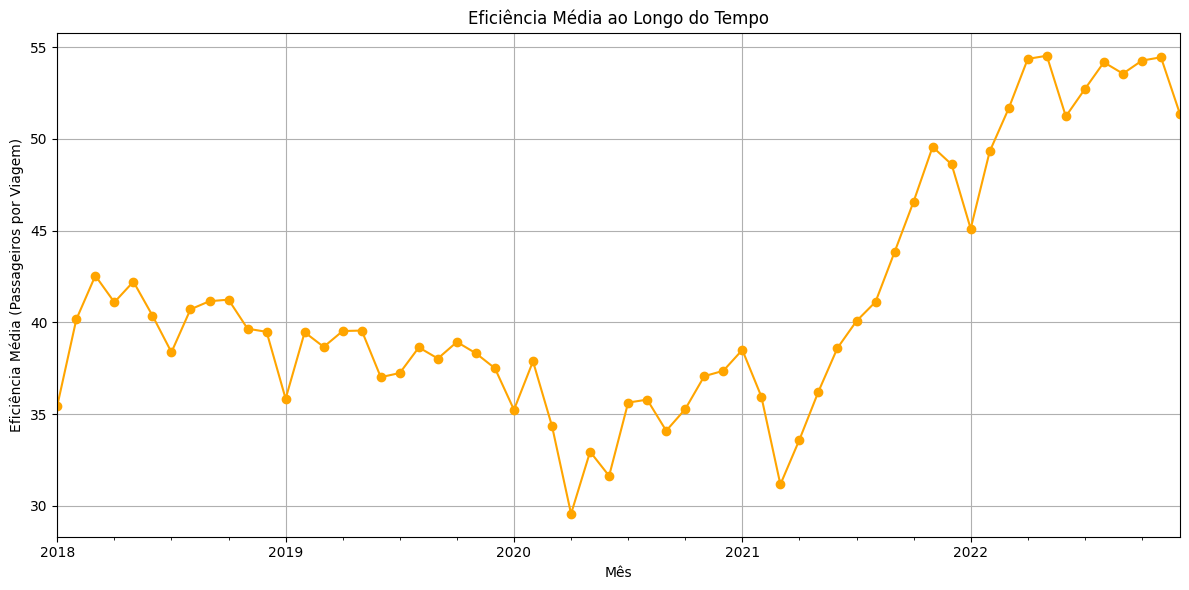

In [23]:
combined_df['Data'] = pd.to_datetime(combined_df['Data'])


eficiencia_por_mes = combined_df.groupby(combined_df['Data'].dt.to_period('M'))['Eficiencia'].mean()


plt.figure(figsize=(12, 6))
eficiencia_por_mes.plot(marker='o', color='orange')
plt.title('Eficiência Média ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Eficiência Média (Passageiros por Viagem)')
plt.grid()
plt.tight_layout()
plt.show()

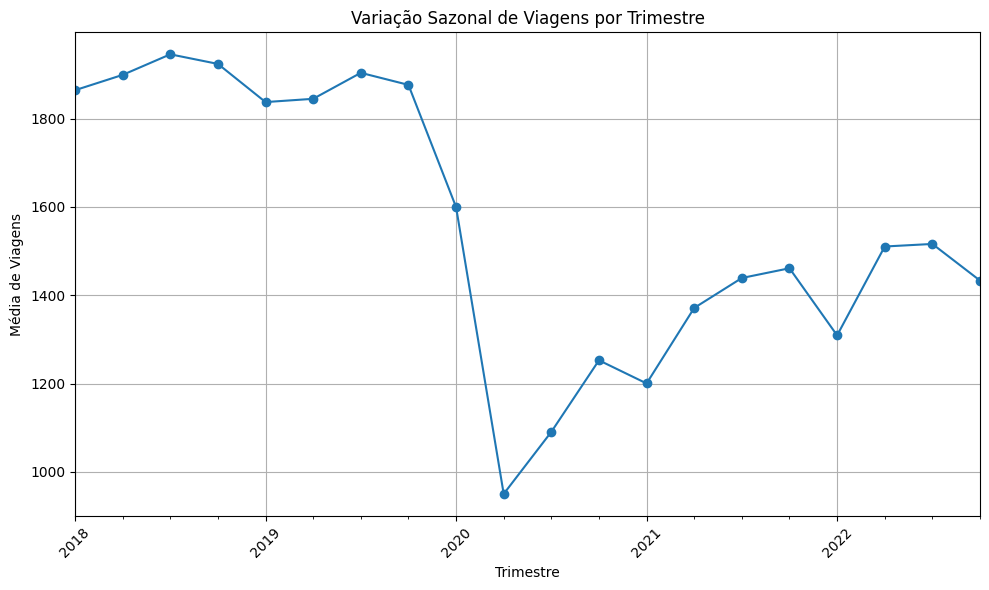

In [24]:
media_viagens_por_trimestre = combined_df.groupby(combined_df['Data'].dt.to_period('Q'))['Qtd_Viagens'].mean()


plt.figure(figsize=(10, 6))
media_viagens_por_trimestre.plot(marker='o')
plt.title('Variação Sazonal de Viagens por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Média de Viagens')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

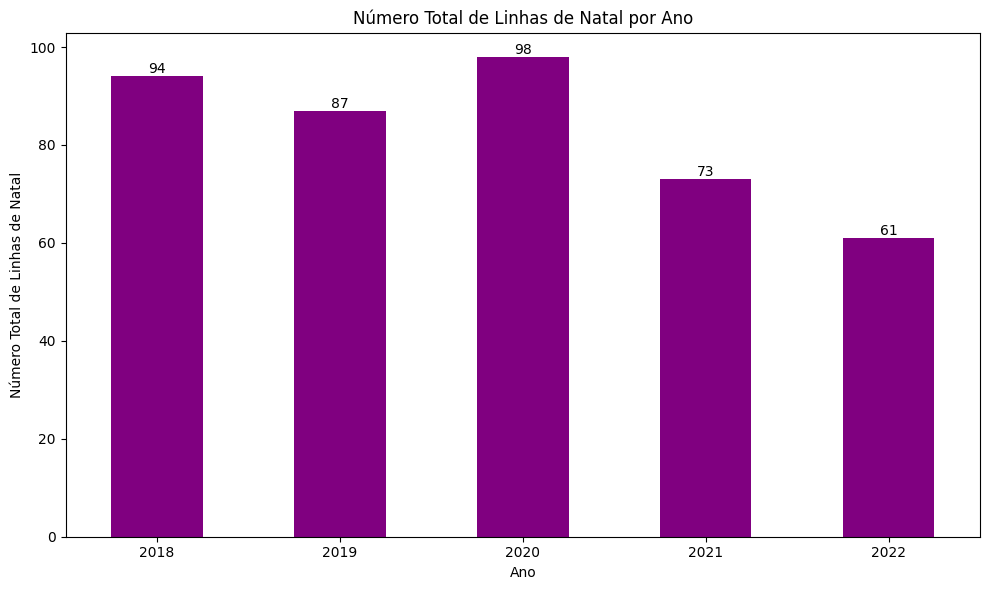

In [25]:

entradas_por_ano = combined_df.groupby('Ano')['Linha'].nunique()

plt.figure(figsize=(10, 6))
bars = entradas_por_ano.plot(kind='bar', color='purple')
plt.title('Número Total de Linhas de Natal por Ano')
plt.xlabel('Ano')
plt.ylabel('Número Total de Linhas de Natal')
plt.xticks(rotation=0)


for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()
